https://www.kaggle.com/competitions/competitive-data-science-predict-future-sales

In [1]:
import pandas as pd

data_path = '../data/'

sales_train = pd.read_csv(data_path+'sales_train.csv')
shops = pd.read_csv(data_path+'shops.csv')
items = pd.read_csv(data_path+'items.csv')
item_categories = pd.read_csv(data_path+'item_categories.csv')
test = pd.read_csv(data_path+'test.csv')
submission = pd.read_csv(data_path+'sample_submission.csv')

sales_train.shape, shops.shape, items.shape, item_categories.shape, test.shape, submission.shape

((2935849, 6), (60, 2), (22170, 3), (84, 2), (214200, 3), (214200, 2))

In [2]:
sales_train.head()


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [3]:
sales_train.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            2935849 non-null  object 
 1   date_block_num  2935849 non-null  int64  
 2   shop_id         2935849 non-null  int64  
 3   item_id         2935849 non-null  int64  
 4   item_price      2935849 non-null  float64
 5   item_cnt_day    2935849 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [4]:
train = sales_train.merge(shops, on='shop_id', how='left')
train = train.merge(items, on = 'item_id', how='left')
train = train.merge(item_categories, on = 'item_category_id', how='left')

train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


In [5]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values

    return summary

resumetable(train)

데이터셋 형상: (2935849, 10)


,피처,데이터 타입,결측값 개수,첫 번째 값,두 번째 값
0,date,object,0,02.01.2013,03.01.2013
1,date_block_num,int64,0,0,0
2,shop_id,int64,0,59,25
3,item_id,int64,0,22154,2552
4,item_price,float64,0,999.0,899.0
5,item_cnt_day,float64,0,1.0,1.0
6,shop_name,object,0,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум"""
7,item_name,object,0,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP
8,item_category_id,int64,0,37,58
9,item_category_name,object,0,Кино - Blu-Ray,Музыка - Винил


<AxesSubplot:ylabel='item_cnt_day'>

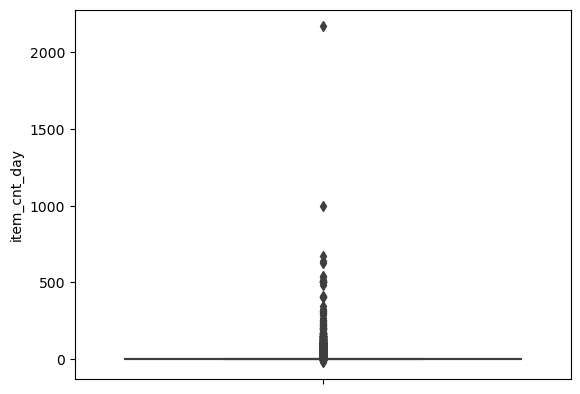

In [6]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(y='item_cnt_day', data=train)

<AxesSubplot:ylabel='item_price'>

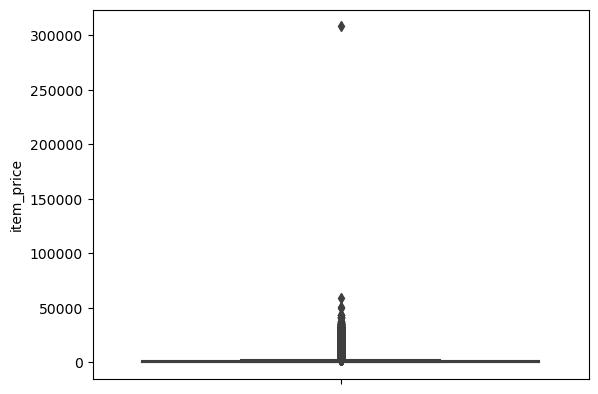

In [7]:
sns.boxplot(y='item_price', data=train)

In [8]:
group = train.groupby('date_block_num').agg({'item_cnt_day':'sum'})
group.reset_index()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


[Text(0.5, 1.0, 'Distribution of monthly item counts by date block number'),
 Text(0.5, 0, 'Date block number'),
 Text(0, 0.5, 'Monthly item counts')]

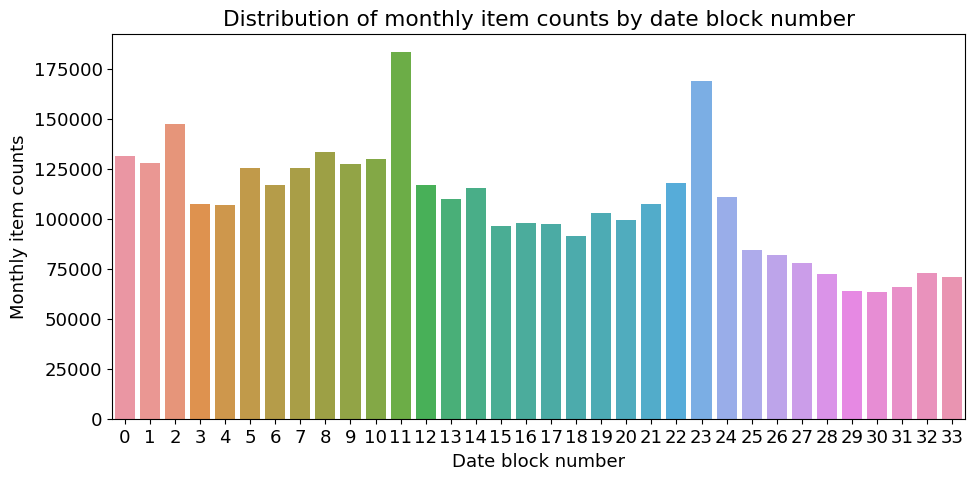

In [9]:
mpl.rc('font', size = 13)
figure, ax = plt.subplots()
figure.set_size_inches(11,5)

group_month_sum = train.groupby('date_block_num').agg({'item_cnt_day': 'sum'}).reset_index()

sns.barplot(x= 'date_block_num', y= 'item_cnt_day', data=group_month_sum)
ax.set(title='Distribution of monthly item counts by date block number',
       xlabel = 'Date block number',
       ylabel = 'Monthly item counts')

In [10]:
train['item_category_id'].nunique()

84

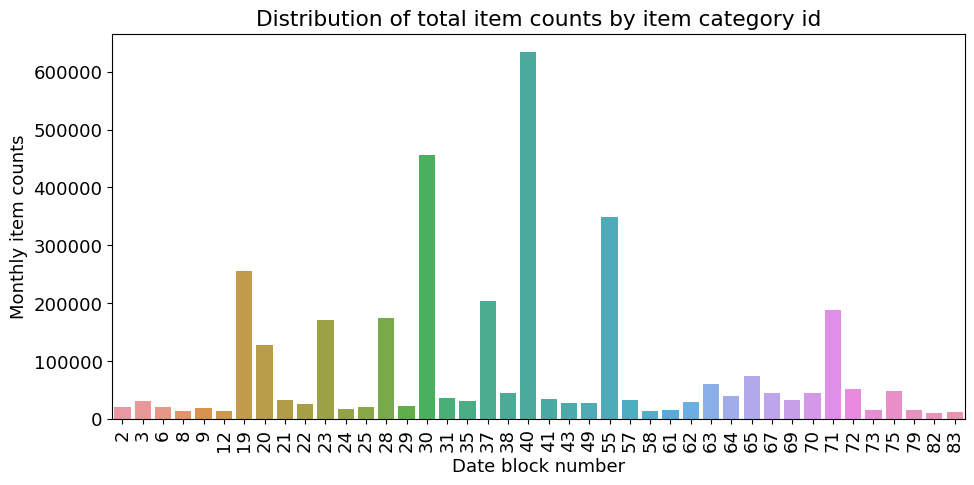

In [11]:
figure, ax = plt.subplots()
figure.set_size_inches(11,5)

group_cat_sum = train.groupby('item_category_id').agg({'item_cnt_day':'sum'}).reset_index()

group_cat_sum = group_cat_sum[group_cat_sum['item_cnt_day']>10000]

sns.barplot(x= 'item_category_id', y= 'item_cnt_day', data=group_cat_sum)
ax.set(title='Distribution of total item counts by item category id',
       xlabel = 'Date block number',
       ylabel = 'Monthly item counts')

ax.tick_params(axis='x', labelrotation= 90)